In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df[['Survived','Pclass','Sex','Age','Fare']]

In [41]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


**Cleaning DataSet**

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [7]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [8]:
df['Age']=df.groupby("Sex")['Age'].transform(lambda x: x.fillna(x.mean()))

**Changing category column to numerical column**

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df['Sex'] = le.fit_transform(df.Sex)

df.head()

In [12]:
X = df[['Pclass','Sex','Age','Fare']]
y= df['Survived']

**Doing train_test_split**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Training the model**

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

**Checking accuracy of testing dataset**

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
predictions_test = clf.predict(X_test)
accuracy_score(y_test, predictions_test)

0.7723880597014925

**Checking accuracy of training dataset**

In [19]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train, predictions_train)

0.9807383627608347

**Here we can clearly see that for training dataset our accuracy is very high whereas for test dataset it is very low,hence our model is overfitted and to avoid this we will use Pruning method later.**

**Visualizing our final decision tree**

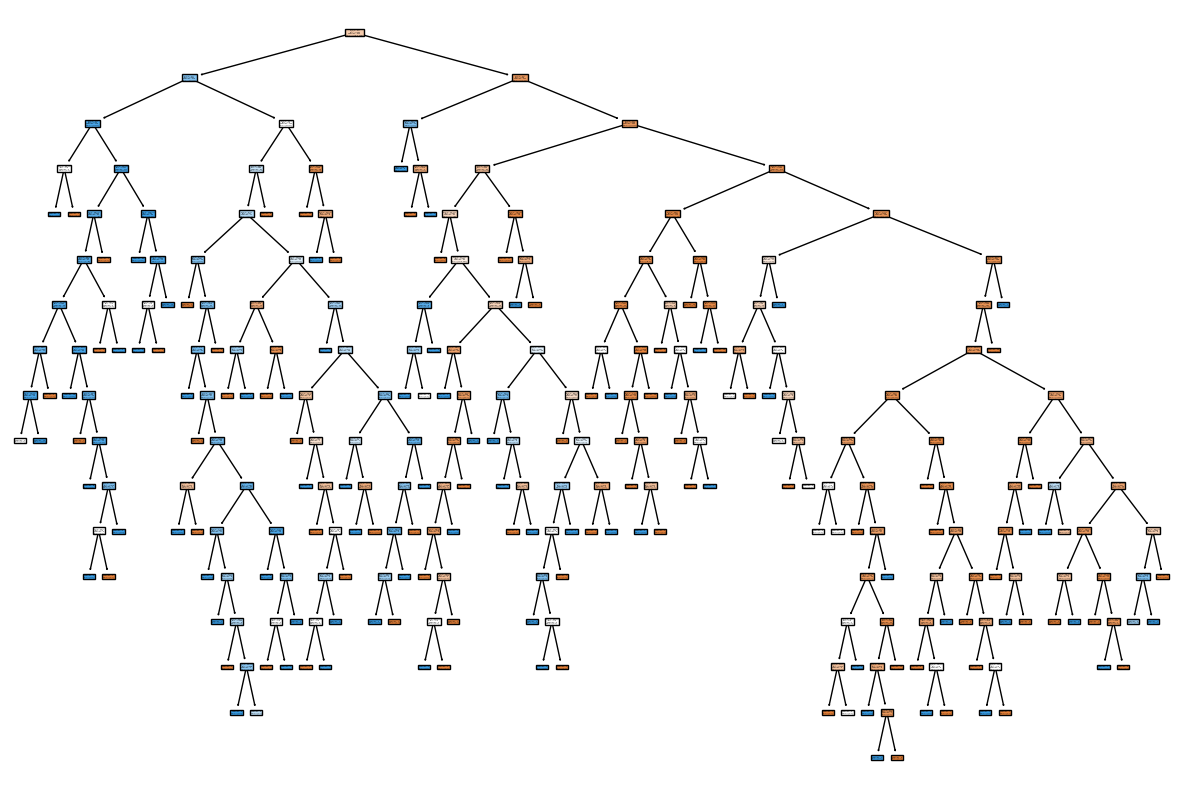

In [20]:
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(clf, filled= True)
plt.show()

**Evaluating our test dataset**

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(y_test, predictions_test))
print(confusion_matrix(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

[[132  22]
 [ 39  75]]


**Evaluating our training dataset**

In [23]:
print(classification_report(y_train, predictions_train))
print(confusion_matrix(y_train, predictions_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       395
           1       0.99      0.96      0.97       228

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623

[[392   3]
 [  9 219]]


**Finding false positive rate and true positive rate**

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [25]:
dt_probs = clf.predict_proba(X_test)[:, 1]

In [26]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

**Plotting ROC curve for our Decision Tree**

In [27]:
auc_score_dt = auc(fpr_dt, tpr_dt)
auc_score_dt

0.7737240829346091

In [28]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' %auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

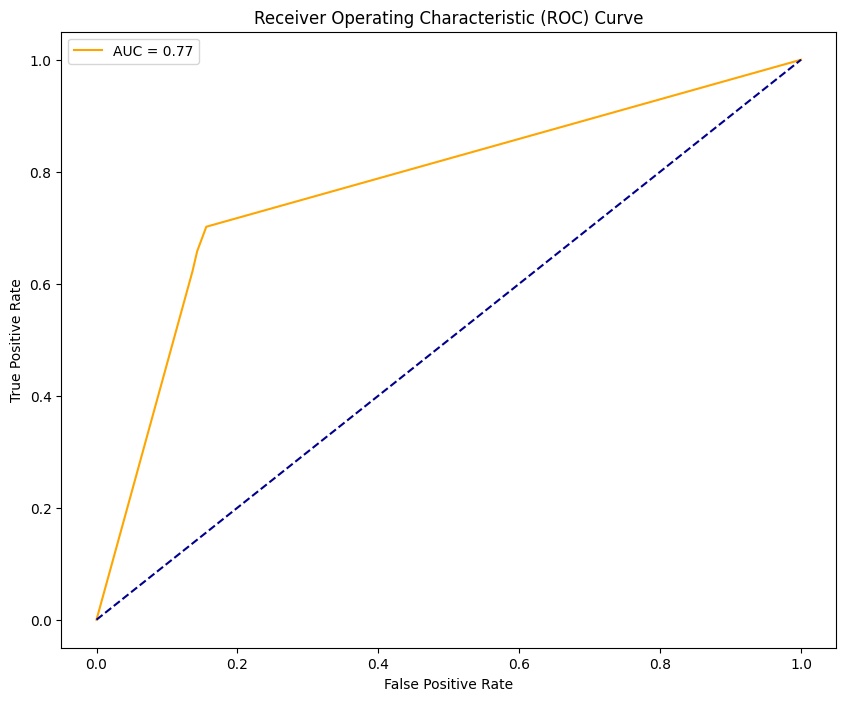

In [29]:
plot_roc_curve(fpr_dt, tpr_dt)

**Pruning of our decision tree**

In [30]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

**Visualizing alpha w.r.t impurity of leaves**

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

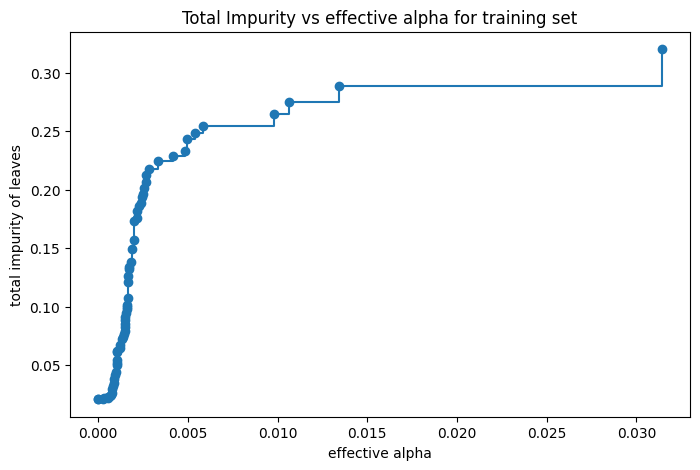

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle = 'steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')

In [32]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print('Number of nodes in the last tree is {} with ccp_alpha: {}'.format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is 1 with ccp_alpha: 0.14413839230607062


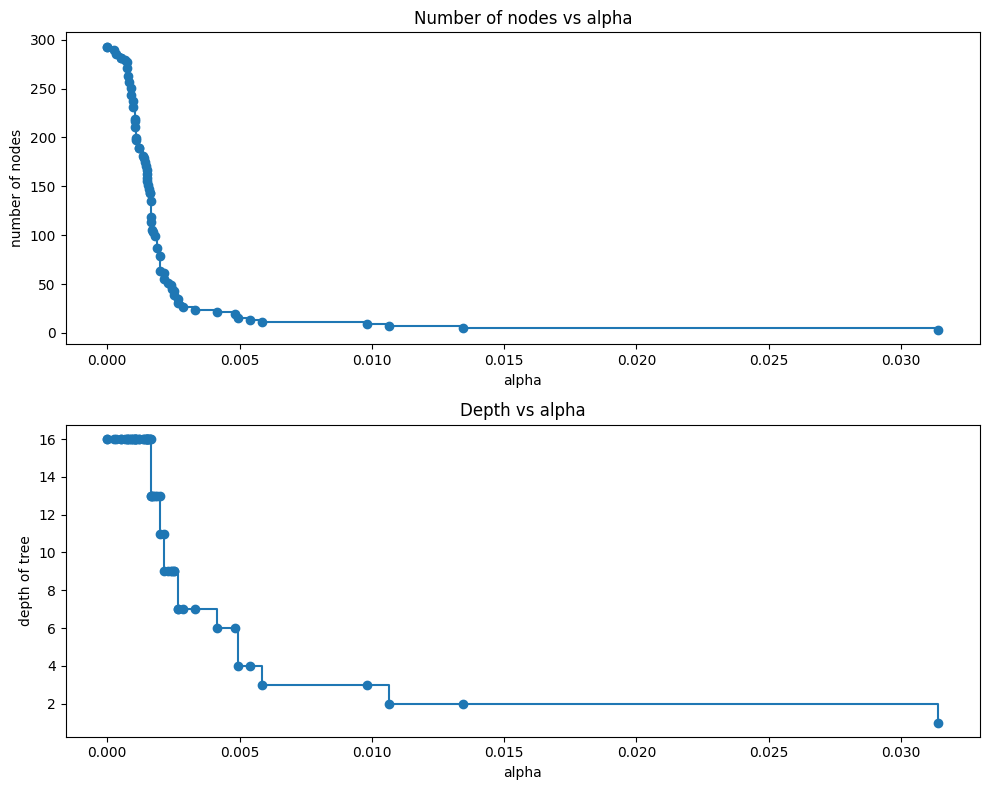

In [33]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout()

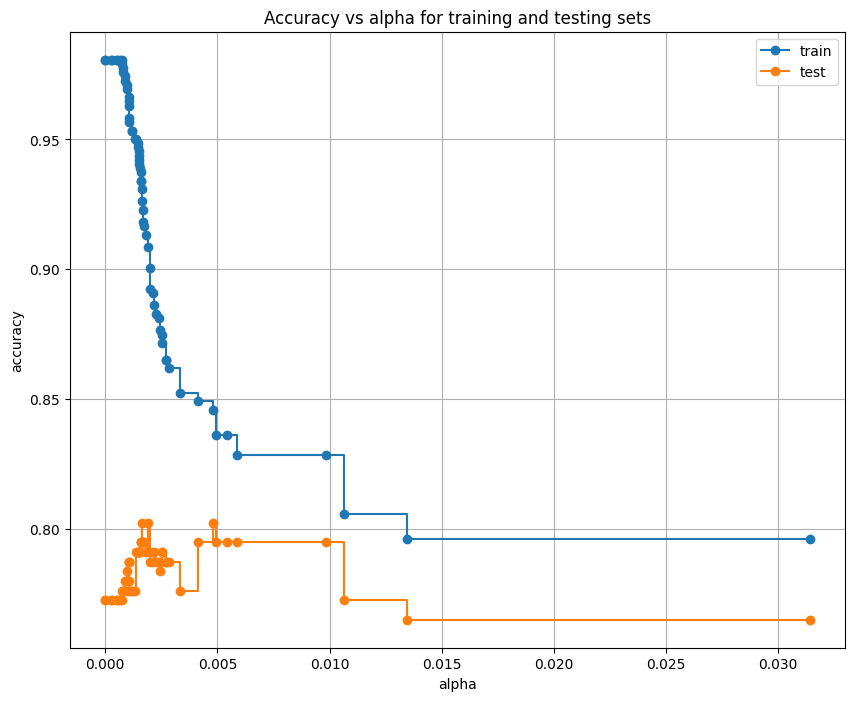

In [34]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

**Accuracy after pruning**

In [35]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

**Accuracy of test dataset**

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
pred= clf.predict(X_test)
accuracy_score(y_test, pred)

0.7649253731343284

**Accuracy of training dataset**

In [38]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train, pred_1)

0.7961476725521669

**Visualizing after pruning**

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.464\nsamples = 623\nvalue = [395.0, 228.0]'),
 Text(0.4, 0.5, 'x[0] <= 2.5\ngini = 0.394\nsamples = 219\nvalue = [59, 160]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.14\nsamples = 119\nvalue = [9, 110]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.8, 0.5, 'gini = 0.28\nsamples = 404\nvalue = [336, 68]')]

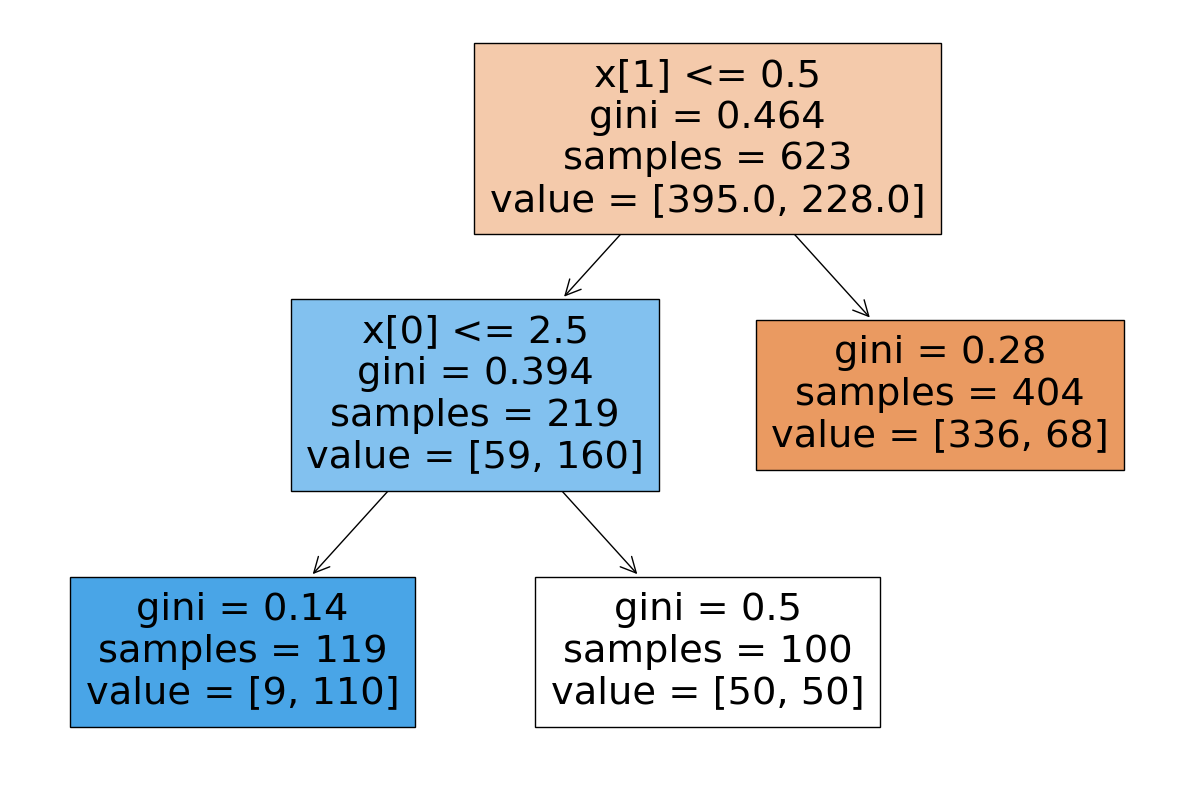

In [39]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)